# Bonus Question

### How to make sure we produce state $\lvert01\rangle$ + $\lvert10\rangle$ and not $\lvert01\rangle$ - $\lvert10\rangle$ ?

Explanation: At the beginning of the main notebook, a circuit is shown having one Pauli $X$ operator on the second qubit and a $H$ gate on the first qubit. From theory it is known that, $H$ gate rotates $\lvert0\rangle$ state to $\lvert+\rangle$ state and $\lvert1\rangle$ to $\lvert-\rangle$ state. Also, Pauli $X$ gate flips $\lvert0\rangle$ to $\lvert1\rangle$ and vice versa.

So, initially both qubits are in $\lvert0\rangle$ state. Pauli $X$ gate flips $\lvert0\rangle$ to $\lvert1\rangle$. And applying $H$ gate creates possibility of $\frac{1}{2}$ $\lvert0\rangle$ state and $\frac{1}{2}$ $\lvert1\rangle$ state. And, when the first qubit represents $\lvert0\rangle$ state, applying $CX$ gate does not change the state of second qubit. So it becomes $\lvert01\rangle$. Similarly, when the first qubit is in $\lvert1\rangle$ state, the second qubit becomes $\lvert0\rangle$ after applying $CX$ gate. Here, as the $H$ gate rotates $\lvert0\rangle$ to $\lvert+\rangle$ state, the resulting state from the circuit becomes $\lvert01\rangle+\lvert10\rangle$.

Hence, the circuit that was experimented ensures that we produce only $\lvert01\rangle+\lvert10\rangle$ state.

### Procedure to check :

    To check the state, I am goig to reduce it to its intial state. There is a Bell state table mentioned on page 26 in " Quantum Computation & Quantum Information by Nielsen and Chuang " book. 
    
    So, to obtain the desired state, the system should be in |01> state.

Let us test this procedure on Bell states first. (Qiskit circuits are used for this)

In [2]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import *
import matplotlib.pyplot as plt

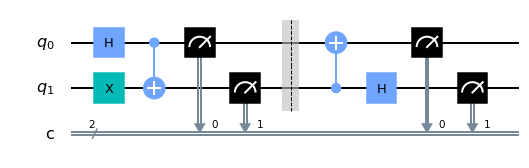

In [4]:
q = QuantumCircuit(2,2)

q.x(1)                                      # this circuit is for the desired state
q.h(0)                               
q.cx(0,1)
q.measure((0,1),(0,1))
q.barrier(range(2))                        # after measuring the output if we apply CX and H gate again, we will obtain the 
                                          ## state |01>; which is our basis state
q.cx(1,0)           
q.h(1)
q.measure((0,1),(0,1))
q.draw('mpl')

& the corresponding state vector to this state is 
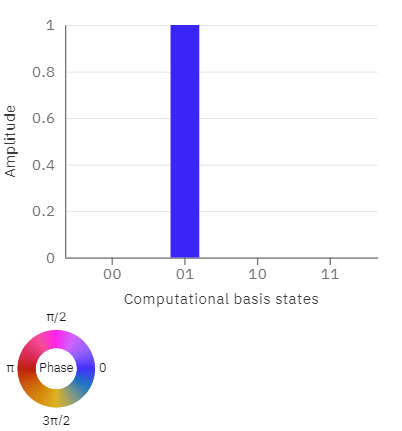

### Similary, for the other Bell state

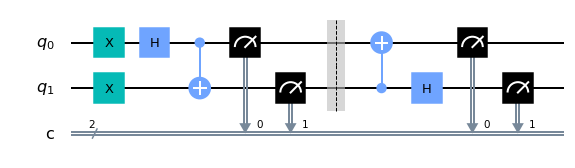

In [5]:
q = QuantumCircuit(2,2)

q.x(0)
q.x(1)                                         # this circuit is for the desired state
q.h(0)                               
q.cx(0,1)
q.measure((0,1),(0,1))
q.barrier(range(2))                        # after measuring the output if we apply CX and H gate again, we will obtain the 
                                          ## state |01>; which is our basis state
q.cx(1,0)           
q.h(1)
q.measure((0,1),(0,1))
q.draw('mpl')

Howerver, the state |01⟩ -  |10⟩ will reduce to |11>
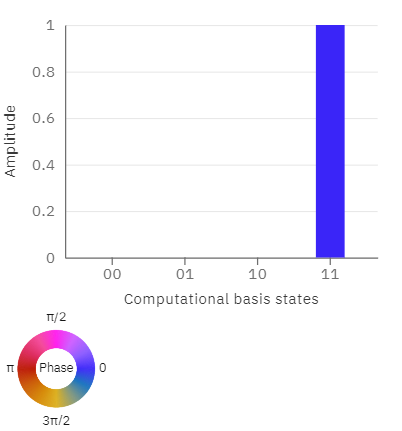


### Let us apply this procedure on our main circuit, which is :

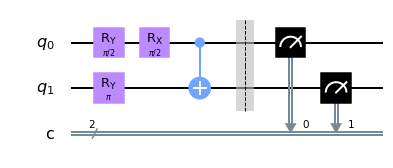

In [7]:
import numpy as np
q = QuantumCircuit(2,2)

# qc.rx(np.pi,0
q.ry((np.pi/2),0)
q.ry(np.pi,1)
q.rx((np.pi/2),0)
q.cx(0,1)
q.barrier(range(2))
q.measure((0,1),(0,1))

q.draw('mpl')

and corresponsing statevector to this circuit is 
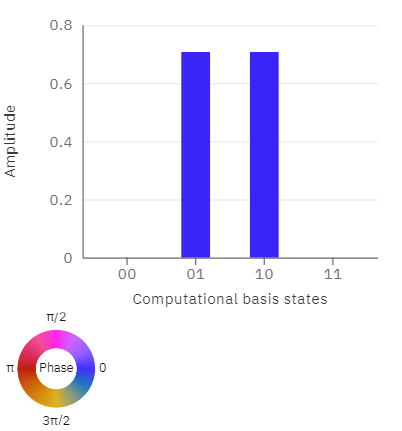

and reducing this circuit will result into :

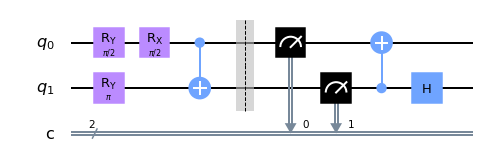

In [8]:
q = QuantumCircuit(2,2)

# qc.rx(np.pi,0
q.ry((np.pi/2),0)
q.ry(np.pi,1)
q.rx((np.pi/2),0)
q.cx(0,1)
q.barrier(range(2))
q.measure((0,1),(0,1))

q.cx(1,0)
q.h(1)

q.draw('mpl')

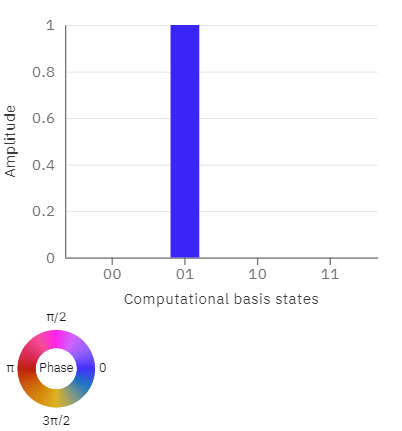

which is same as the intial result.

### Note :  I have tried this procedure with other circuits also and it reduces to correct basis state.